### ELEX 4653 Lab 4

In this lab you will practice importing packages, reading files and using a library to find the shortest path through a graph.  In this example, graph's edge weights represent distances between cities but there are many other applications. The cities data was obtained from:
https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

This notebook as well as `lab4.py` and the three `ha30*.txt` files found in `lab4.zip` should be extracted into the same directory from which you will run this notebook.

Instructions:

- Modify this notebook by adding the Python code described below.

- Test your code using the menu item `Cell ► Run All`

- Submit the notebook (the .ipynb file) to the appropriate dropbox on the course web site.


**Q1**: Add two statements below that: (1) import the `lab4` module and (2) import the function `testfun` from the lab4 module into the global namespace.

In [8]:
import lab4
from lab4 import testfun

**Q2**: Read the lines in the file `ha30_code.txt`, ignoring lines starting with '#'.  Remove trailing whitespace from each line and saved the lines in a list named `codes`.

In [9]:
codes=[s.rstrip() for s in open('ha30_code.txt') if s[0] != '#']

**Q3**: Read the lines in the file `ha30_name.txt`, ignoring lines starting with '#'.  Remove trailing whitespace from each line and saved the lines in a list named `names`.

In [10]:
names=[s.rstrip() for s in open('ha30_name.txt') if s[0] != '#']

**Q4**: Read the lines in the file `ha30_dist.txt`, ignoring lines starting with '#'.  Other lines should be `split` into fields using whitespace as the separator.  Each field should be converted to an `int`eger and saved in a list.  These lists should be placed in another list called `dist`.  Thus `dist` will be a list of lists (similar to a 2-dimensional array).

In [15]:
dist=[[int(n) for n in s.split()] 
      for s in open('ha30_dist.txt') if s[0] != '#']

**Q5**: Import the `networkx` package as `nx`.  Call the function `lab4graph` which will return a 30-node graph with edge weights set to the distances in `dist`.  Set the variable `routes` to this graph.  Note: each time you call `lab4graph` you will get a graph with a different set of edges.

In [17]:
import networkx as nx
routes=lab4.lab4graph(dist)

**Q6**: Use the function `dijkstra_path` from the `x.algorithms.shortest_paths.weighted` module to compute the shortest path from the node `s` to node `d` (`s` and `d` are computed below). Set the variable `p` to this path.  Then use the function `lab4draw(g,d,p)` to draw the path `p` through the graph `g` that has edge distance matrix `d`.  [In this case `g` is `routes`, `d` is `dist` and `p` is the path returned from  `dijkstra_path`.

Re-compute and plot the shortest path a few times to verify that the algorithm is finding the shortest path through the graph.

shortest path from 16 to 5:


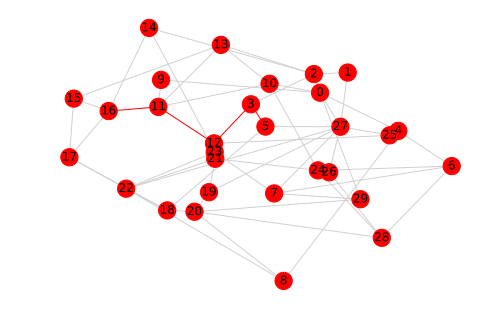

In [18]:
%config InlineBackend.figure_format = 'svg'
from random import randint
src,dest=randint(0,29),randint(0,29)
print("shortest path from {} to {}:".format(src,dest))
# your code here:

p=nx.algorithms.shortest_paths.weighted.dijkstra_path(
    routes,source=src,target=dest,weight='weight')

lab4.lab4draw(routes,dist,p)

In [20]:
# lab validation code; do not modify
def lab4check():
    try:
        Q=1
        assert 'testfun' in globals().keys(), 'testfun() not found'
        assert 'lab4' in globals().keys(), 'lab4 not found'
        assert testfun() == 2, "testfun returns wrong value"
        print("Question {} OK.".format(Q))
    except Exception as e:
        print("Failed check for Question {}: {}".format(Q,e))     

    try:
        Q=2
        import hashlib
        assert len(codes) == 30, 'wrong number of values in code[]'
        assert hashlib.md5(''.join(codes).encode('utf8')).hexdigest() == \
            'f0f808382c80a43b0f9c3943fab9c093', 'wrong values in code[]'
        print("Question {} OK.".format(Q))
    except Exception as e:
        print("Failed check for Question {}: {}".format(Q,e)) 
        
    try:
        Q=3
        import hashlib
        assert len(names) == 30, 'wrong number of values in names[]'
        assert hashlib.md5(''.join(names).encode('utf8')).hexdigest() == \
            '88aed2a352fcbd5a6a863f268858b55c', 'wrong values in names[]'
        print("Question {} OK.".format(Q))
    except Exception as e:
        print("Failed check for Question {}: {}".format(Q,e)) 
        
    try:
        Q=4
        assert len(dist) == 30, 'wrong dimension for dist'
        assert all(len(dist[i]) == 30 for i in range(30)), \
            'wrong dimension for dist[]'
        assert all(type(dist[i][j]) == int for i in range(30) for j in range(30)), \
            'wrong type(s) in dist[][]'
        s=''.join(str(dist[i][j]) for i in range(30) for j in range(30))
        assert hashlib.md5(s.encode('utf8')).hexdigest() == 'a8f15d0984f9cda8e392a60622c0551b', \
            'wrong values in dist[][]'
        print("Question {} OK.".format(Q))
    except Exception as e:
        print("Failed check for Question {}: {}".format(Q,e)) 
        
    try:
        Q=5
        import networkx
        assert 'nx' in globals().keys(), 'module nx not found'
        assert len(routes.nodes) == len(dist), 'routes wrong size'
        assert type(routes) == networkx.classes.graph.Graph, 'routes is wrong type'
        print("Question {} OK.".format(Q))
    except Exception as e:
        print("Failed check for Question {}: {}".format(Q,e)) 
        
    try:
        Q=6
        import networkx
        assert p[0] == src and p[-1] == dest, 'shortest path does not start/end at src/dest'
        print("Question {} OK.".format(Q))
    except Exception as e:
        print("Failed check for Question {}: {}".format(Q,e)) 
        
lab4check()

Question 1 OK.
Question 2 OK.
Question 3 OK.
Question 4 OK.
Question 5 OK.
Question 6 OK.
